In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
df = pd.read_csv('data_assignment.csv')
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [3]:
df.shape

(149999, 13)

In [4]:
df.nunique()

Id                   149999
Title                 92115
Company               26318
Date                     44
Location                 65
Area                     19
Classification           30
SubClassification       338
Requirement          121324
FullDescription      127676
LowestSalary             11
HighestSalary            11
JobType                   4
dtype: int64

In [5]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [6]:
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex = True)
df["Date"] = pd.to_datetime (df["Date"])
df['Id'] =  pd.to_numeric(df['Id'])

In [7]:
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [8]:
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [9]:
df["AverageSalary"] = (df["LowestSalary"]+df["HighestSalary"])/2
print(df[['Title', 'AverageSalary']])

                                                    Title  AverageSalary
0                                Casual Stock Replenisher           15.0
1                                Casual Stock Replenisher           15.0
2       RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...           15.0
3                                   Team member - Belrose           15.0
4       Business Banking Contact Centre Specialist, Ni...           15.0
...                                                   ...            ...
149994                           Dance Studio Coordinator           15.0
149995                                 Geology Technician           15.0
149996                         Lead Product Manager UX/UI           15.0
149997                             Junior Primary Teacher           15.0
149998                                  Network Engineer            15.0

[149999 rows x 2 columns]


In [10]:
df[df.duplicated(subset=df.columns.difference(['Id']))].shape[0]

611

In [11]:
df.drop_duplicates(subset=df.columns.difference(['Id']), inplace = True) 

In [12]:
df[df.duplicated(subset=df.columns.difference(['Id']))].shape[0]

0

In [13]:
#Section 1 - Data Analysis and Interpretation
#Part 1 - Analyse by comparison
#Choose your two favourite cities/locations: Brisbane and Sydney

In [14]:
#Which city has more jobs? How many jobs of each type are there in each city? First way to find:
Brisbane = df[(df['Location'] == "Brisbane")]
Brisbane = Brisbane.groupby('JobType').count()
Brisbane['JobType'] = Brisbane.index
Brisbane.loc['Sum Count'] = Brisbane.sum()
print('Number of Job Postings by Job Type in Brisbane')
print(Brisbane["Id"])

Sydney = df[(df['Location'] == "Sydney")]
Sydney = Sydney.groupby('JobType').count()
Sydney['JobType'] = Sydney.index
Sydney.loc['Sum Count'] = Sydney.sum()
print('Number of Job Postings by Job Type in Sydney')
print(Sydney["Id"])

Number of Job Postings by Job Type in Brisbane
JobType
Casual/Vacation     1537
Contract/Temp       3149
Full Time          10381
Part Time            982
Sum Count          16049
Name: Id, dtype: int64
Number of Job Postings by Job Type in Sydney
JobType
Casual/Vacation     2530
Contract/Temp       8381
Full Time          32143
Part Time           2271
Sum Count          45325
Name: Id, dtype: int64


In [15]:
#Which city has more jobs? How many jobs of each type are there in each city? Second way to find:
favcities_JobType = df[(df["Location"] == "Brisbane") | (df["Location"] == "Sydney")]
favcities_JobType = favcities_JobType.groupby(['Location','JobType']).count()
favcities_JobType['JobType'] = favcities_JobType.index
favcities_JobType['Count'] = favcities_JobType["Id"]
favcities_JobType.loc['Sum Count'] = favcities_JobType.sum()
print('Number of Job Postings by Job Type in Brisbane and Sydney')
print(favcities_JobType["Id"])

Number of Job Postings by Job Type in Brisbane and Sydney
(Brisbane, Casual/Vacation)     1537
(Brisbane, Contract/Temp)       3149
(Brisbane, Full Time)          10381
(Brisbane, Part Time)            982
(Sydney, Casual/Vacation)       2530
(Sydney, Contract/Temp)         8381
(Sydney, Full Time)            32143
(Sydney, Part Time)             2271
Sum Count                      61374
Name: Id, dtype: int64


In [16]:
#In each city, which are the top 5 job sectors? How many jobs are there in each sector? For Brisbane:
Brisbane = df[(df['Location'] == "Brisbane")]
Brisbane = Brisbane.groupby('Classification').count()
print ("Top five sectors in Brisbane with total number of job postings")
Brisbane.sort_values("Id", ascending = False)["Id"].head(5)

Top five sectors in Brisbane with total number of job postings


Classification
Information & Communication Technology    2036
Trades & Services                         1625
Healthcare & Medical                      1336
Manufacturing, Transport & Logistics      1335
Hospitality & Tourism                     1030
Name: Id, dtype: int64

In [17]:
#In each city, which are the top 5 job sectors? How many jobs are there in each sector? For Sydney:
Sydney = df[(df['Location'] == "Sydney")]
Sydney = Sydney.groupby('Classification').count()
print ("Top five sectors in Sydney with total number of job postings")
Sydney.sort_values("Id", ascending = False)["Id"].head(5)

Top five sectors in Sydney with total number of job postings


Classification
Information & Communication Technology    6971
Trades & Services                         3170
Accounting                                3097
Hospitality & Tourism                     3076
Manufacturing, Transport & Logistics      2526
Name: Id, dtype: int64

    Location                          Classification    Id
17  Brisbane  Information & Communication Technology  2036
29  Brisbane                       Trades & Services  1625
14  Brisbane                    Healthcare & Medical  1336
20  Brisbane    Manufacturing, Transport & Logistics  1335
15  Brisbane                   Hospitality & Tourism  1030


Text(0.5, 1.0, 'Job Posts in the Top 5 sectors in Brisbane')

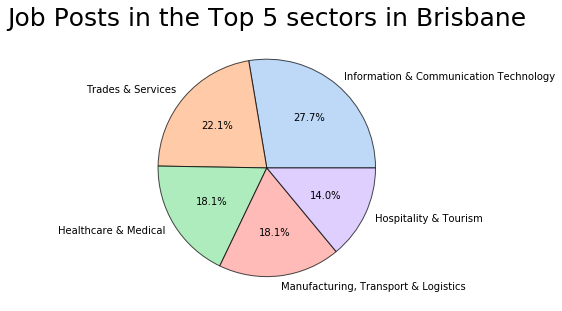

In [18]:
#Visualise the top 5 job sectors in pie chart for each city. For Brisbane:
#Create dataframe for top 5 sectors in Brisbane and calculate the totals
Brisbane = df[(df['Location'] == "Brisbane")]
Brisbane = Brisbane.groupby(['Location','Classification'], as_index=False)['Id'].count()
dfTop = Brisbane.sort_values(['Location', 'Id'], ascending=False).groupby('Location').head(5)
print (dfTop)

# plot job type and format pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(dfTop['Id'], colors=sns.color_palette("pastel", len(dfTop)),labels=dfTop['Classification'], wedgeprops={"edgecolor":"k",'linewidth': 1,'alpha':0.7},autopct='%.1f%%')
ax.set_title('Job Posts in the Top 5 sectors in Brisbane', size=25, color='black', loc='center')

   Location                          Classification    Id
17   Sydney  Information & Communication Technology  6971
29   Sydney                       Trades & Services  3170
0    Sydney                              Accounting  3097
15   Sydney                   Hospitality & Tourism  3076
20   Sydney    Manufacturing, Transport & Logistics  2526


Text(0.5, 1.0, 'Job Posts in the Top 5 sectors in Sydney')

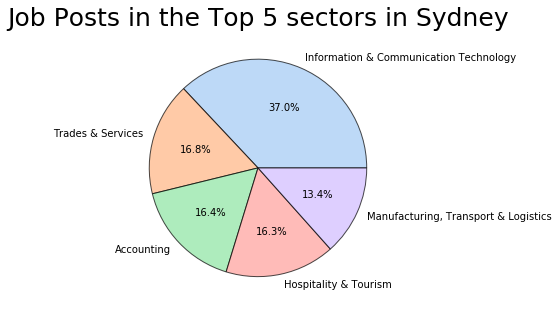

In [19]:
#Visualise the top 5 job sectors in pie chart for each city. For Sydney:
#Create dataframe for top 5 sectors in Sydney and calculate the totals
Sydney = df[(df['Location'] == "Sydney")]
Sydney = Sydney.groupby(['Location','Classification'], as_index=False)['Id'].count()
dfTop = Sydney.sort_values(['Location', 'Id'], ascending=False).groupby('Location').head(5)
print (dfTop)

# plot job type and format pie chart
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(dfTop['Id'], colors=sns.color_palette("pastel", len(dfTop)),labels=dfTop['Classification'], wedgeprops={"edgecolor":"k",'linewidth': 1,'alpha':0.7},autopct='%.1f%%')
ax.set_title('Job Posts in the Top 5 sectors in Sydney', size=25, color='black', loc='center')

In [20]:
#In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?
df['SalaryRange'] = df['LowestSalary'].astype(str) + ' - ' + df['HighestSalary'].astype(str)

favcities_Salary = df[(df["Location"] == "Brisbane") | (df["Location"] == "Sydney")]
favcities_Salary = favcities_Salary.groupby(['Location','SalaryRange']).count()
favcities_Salary['SalaryRange'] = favcities_Salary.index
favcities_Salary['Count'] = favcities_Salary["Id"]
favcities_Salary.loc['Sum Count'] = favcities_Salary.sum()
favcities_Salary.sort_values("SalaryRange")["SalaryRange"]
print('Number of Job Postings by Salary Range in Brisbane and Sydney')
print(favcities_Salary["Id"])

Number of Job Postings by Salary Range in Brisbane and Sydney
(Brisbane, 0 - 30)        2951
(Brisbane, 100 - 120)     1484
(Brisbane, 120 - 150)     1058
(Brisbane, 150 - 200)     1195
(Brisbane, 200 - 250)      545
(Brisbane, 30 - 40)       1188
(Brisbane, 40 - 50)       2265
(Brisbane, 50 - 60)       1478
(Brisbane, 60 - 70)       1608
(Brisbane, 70 - 80)       1383
(Brisbane, 80 - 100)      1306
(Sydney, 0 - 30)          8399
(Sydney, 100 - 120)       4303
(Sydney, 120 - 150)       4198
(Sydney, 150 - 200)       4695
(Sydney, 200 - 250)       1755
(Sydney, 30 - 40)         3031
(Sydney, 40 - 50)         4388
(Sydney, 50 - 60)         3738
(Sydney, 60 - 70)         4142
(Sydney, 70 - 80)         3839
(Sydney, 80 - 100)        3680
Sum Count                62629
Name: Id, dtype: int64


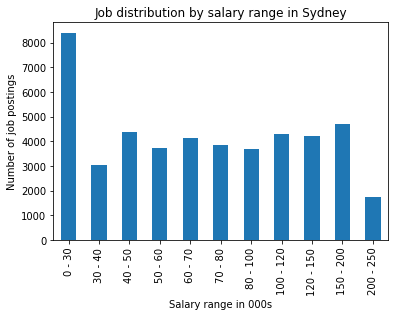

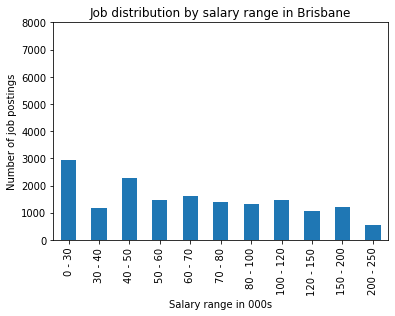

In [21]:
#Related to above - distribution of jobs across salary ranges for the two cities
Sydney = df[(df['Location'] == "Sydney")]
dfTopSyd = Sydney.groupby('SalaryRange').agg({'HighestSalary': ['count','max']})
dfTopSyd.columns = ['JobPostSyd', 'Max Salary']
dfTopSyd = dfTopSyd.reset_index()
dfTopSyd = dfTopSyd.sort_values(by=["Max Salary"], ascending = True)

Brisbane = df[(df['Location'] == "Brisbane")]
dfTopBris = Brisbane.groupby('SalaryRange').agg({'HighestSalary': ['count','max']})
dfTopBris.columns = ['JobPostBris', 'Max Salary']
dfTopBris = dfTopBris.reset_index()
dfTopBris = dfTopBris.sort_values(by=["Max Salary"], ascending = True)

salaryrange_Sydney=dfTopSyd[['SalaryRange', 'JobPostSyd']]
salaryrange_Sydney.plot(x='SalaryRange', y = 'JobPostSyd', kind='bar',legend = False)
plt.title('Job distribution by salary range in Sydney')
plt.xlabel('Salary range in 000s')
plt.ylabel('Number of job postings')
plt.show()

salaryrange_Brisbane=dfTopBris[['SalaryRange', 'JobPostBris']]
salaryrange_Brisbane.plot(x='SalaryRange', y = 'JobPostBris', kind='bar',legend = False)
plt.ylim([0,8000])
plt.title('Job distribution by salary range in Brisbane')
plt.xlabel('Salary range in 000s')
plt.ylabel('Number of job postings')
plt.show()

Text(3.6750000000000043, 0.5, 'Average Salary')

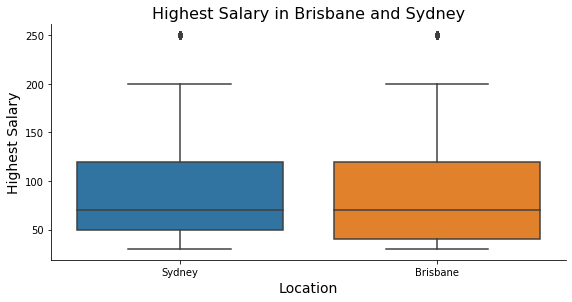

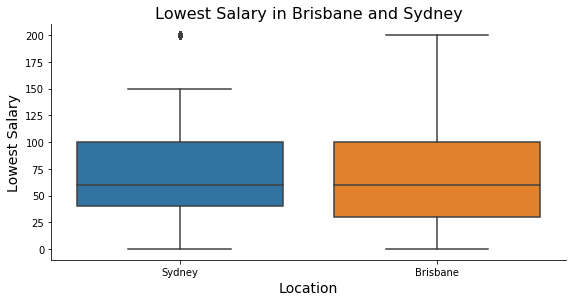

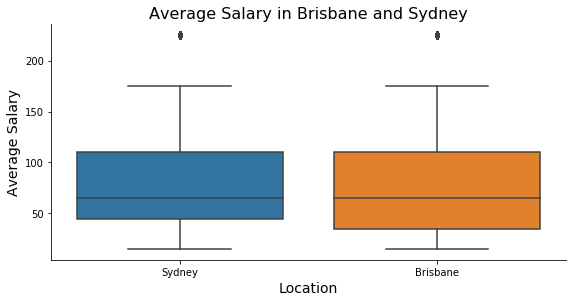

In [22]:
#Related to above - distribution of jobs across salary ranges for the two cities
favcities_Salary = df[(df["Location"] == "Brisbane") | (df["Location"] == "Sydney")]

ax = sns.catplot(x="Location", y="HighestSalary", data = favcities_Salary, kind="box", height=4, aspect=2)
ax.set_xticklabels(rotation=0)
plt.title('Highest Salary in Brisbane and Sydney',size=16,loc='center')
plt.xlabel('Location',size=14)
plt.ylabel('Highest Salary',size=14)

ax = sns.catplot(x="Location", y="LowestSalary", data = favcities_Salary, kind="box", height=4, aspect=2)
ax.set_xticklabels(rotation=0)
plt.title('Lowest Salary in Brisbane and Sydney',size=16,loc='center')
plt.xlabel('Location',size=14)
plt.ylabel('Lowest Salary',size=14)

ax = sns.catplot(x="Location", y="AverageSalary", data = favcities_Salary, kind="box", height=4, aspect=2)
ax.set_xticklabels(rotation=0)
plt.title('Average Salary in Brisbane and Sydney',size=16,loc='center')
plt.xlabel('Location',size=14)
plt.ylabel('Average Salary',size=14)

In [23]:
#List top 5 companies in each city? For Brisbane
Brisbane = df[(df['Location'] == "Brisbane")]
Brisbane['Company'].value_counts()[:5]

Jora Local                      238
u&u. Recruitment Partners       191
Hudson                          187
The University of Queensland    171
Programmed Skilled Workforce    171
Name: Company, dtype: int64

In [24]:
#Which sectors do the top 5 companies belong to? For Brisbane
dfTopCompBris = df[(df['Company'] == "Jora Local") | (df['Company'] == "u&u. Recruitment Partners") | (df['Company'] ==  "Hudson") | (df['Company'] == "Programmed Skilled Workforce") | (df['Company'] == "The University of Queensland")]
dfTopCompBris = dfTopCompBris.groupby(['Company', 'Classification']).count()
dfTopCompBris['Classification'] = dfTopCompBris.index
dfTopCompBris['Count'] = dfTopCompBris["Id"]
dfTopCompBris.loc['Sum Count'] = dfTopCompBris.sum()
print ('Job sectors posted by the top five companies in Brisbane')
dfTopCompBris["Id"].head(50)

Job sectors posted by the top five companies in Brisbane


(Hudson, Accounting)                                                        81
(Hudson, Administration & Office Support)                                   77
(Hudson, Banking & Financial Services)                                      30
(Hudson, CEO & General Management)                                           2
(Hudson, Call Centre & Customer Service)                                     9
(Hudson, Community Services & Development)                                   2
(Hudson, Construction)                                                      39
(Hudson, Consulting & Strategy)                                              8
(Hudson, Design & Architecture)                                              4
(Hudson, Education & Training)                                               4
(Hudson, Engineering)                                                       68
(Hudson, Government & Defence)                                              39
(Hudson, Healthcare & Medical)                      

In [25]:
#Which sectors do the top 5 companies belong to? For Brisbane
dfTopCompBris = df[(df['Company'] == "Jora Local") | (df['Company'] == "u&u. Recruitment Partners") | (df['Company'] ==  "Hudson") | (df['Company'] == "Programmed Skilled Workforce") | (df['Company'] == "The University of Queensland")]
dfTopCompBris = dfTopCompBris.groupby(['Company', 'Classification']).count()
dfTopCompBris['Classification'] = dfTopCompBris.index
dfTopCompBris['Count'] = dfTopCompBris["Id"]
dfTopCompBris.loc['Sum Count'] = dfTopCompBris.sum()
print ('Job sectors posted by the top five companies in Brisbane')
dfTopCompBris["Id"].tail(33)

Job sectors posted by the top five companies in Brisbane


(The University of Queensland, Community Services & Development)             1
(The University of Queensland, Consulting & Strategy)                        1
(The University of Queensland, Design & Architecture)                        1
(The University of Queensland, Education & Training)                       115
(The University of Queensland, Engineering)                                  8
(The University of Queensland, Farming, Animals & Conservation)              1
(The University of Queensland, Healthcare & Medical)                         9
(The University of Queensland, Human Resources & Recruitment)                2
(The University of Queensland, Information & Communication Technology)       6
(The University of Queensland, Marketing & Communications)                   3
(The University of Queensland, Mining, Resources & Energy)                   1
(The University of Queensland, Real Estate & Property)                       1
(The University of Queensland, Science & Technology)

In [26]:
#List top 5 companies in each city? For Sydney
Sydney = df[(df['Location'] == "Sydney")]
Sydney['Company'].value_counts()[:5]

Jora Local                       1425
Robert Walters                    447
Design & Build                    406
Bluefin Resources Pty Limited     252
Paxus                             250
Name: Company, dtype: int64

In [27]:
#Which sectors do the top 5 companies belong to? For Sydney
dfTopCompSyd = df[(df['Company'] == "Jora Local") | (df['Company'] == "Robert Walters") | (df['Company'] ==  "Design & Build") | (df['Company'] == "Bluefin Resources Pty Limited") | (df['Company'] == "Paxus")]
dfTopCompSyd = dfTopCompSyd.groupby(['Company', 'Classification']).count()
dfTopCompSyd['Classification'] = dfTopCompSyd.index
dfTopCompSyd['Count'] = dfTopCompSyd["Id"]
dfTopCompSyd.loc['Sum Count'] = dfTopCompSyd.sum()
print ('Job sectors posted by the top five companies in Sydney')
dfTopCompSyd["Id"].head(50)

Job sectors posted by the top five companies in Sydney


(Bluefin Resources Pty Limited, Accounting)                                  20
(Bluefin Resources Pty Limited, Administration & Office Support)              3
(Bluefin Resources Pty Limited, Banking & Financial Services)                80
(Bluefin Resources Pty Limited, Call Centre & Customer Service)               2
(Bluefin Resources Pty Limited, Consulting & Strategy)                       19
(Bluefin Resources Pty Limited, Design & Architecture)                        2
(Bluefin Resources Pty Limited, Government & Defence)                         6
(Bluefin Resources Pty Limited, Healthcare & Medical)                        24
(Bluefin Resources Pty Limited, Human Resources & Recruitment)                3
(Bluefin Resources Pty Limited, Information & Communication Technology)     124
(Bluefin Resources Pty Limited, Insurance & Superannuation)                  25
(Bluefin Resources Pty Limited, Legal)                                        1
(Bluefin Resources Pty Limited, Manufact

In [28]:
#Which sectors do the top 5 companies belong to? For Sydney
dfTopCompSyd = df[(df['Company'] == "Jora Local") | (df['Company'] == "Robert Walters") | (df['Company'] ==  "Design & Build") | (df['Company'] == "Bluefin Resources Pty Limited") | (df['Company'] == "Paxus")]
dfTopCompSyd = dfTopCompSyd.groupby(['Company', 'Classification']).count()
dfTopCompSyd['Classification'] = dfTopCompSyd.index
dfTopCompSyd['Count'] = dfTopCompSyd["Id"]
dfTopCompSyd.loc['Sum Count'] = dfTopCompSyd.sum()
print ('Job sectors posted by the top five companies in Sydney')
dfTopCompSyd["Id"].tail(12)

Job sectors posted by the top five companies in Sydney


(Robert Walters, Engineering)                                 14
(Robert Walters, Government & Defence)                         3
(Robert Walters, Human Resources & Recruitment)               19
(Robert Walters, Information & Communication Technology)     250
(Robert Walters, Insurance & Superannuation)                   5
(Robert Walters, Legal)                                        8
(Robert Walters, Manufacturing, Transport & Logistics)        13
(Robert Walters, Marketing & Communications)                  23
(Robert Walters, Mining, Resources & Energy)                   7
(Robert Walters, Real Estate & Property)                       4
(Robert Walters, Sales)                                       24
Sum Count                                                   7279
Name: Id, dtype: int64

Text(0.5, 0, 'Month')

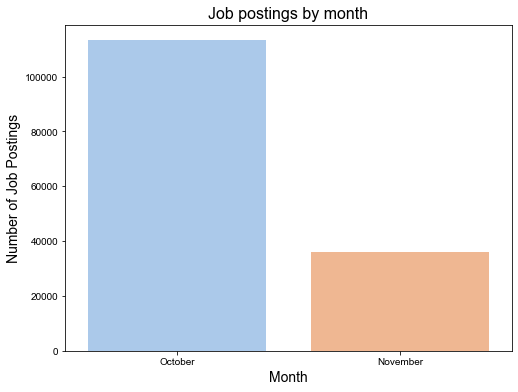

In [29]:
#Section 1 - Data Analysis and Interpretation
#Part 2 - Analyse by time
#Visualise the number of job posts by month.
df_monthly_counts = df[df["Date"].isna()==False]
df_monthly_counts["Month"] =  [x.strftime("%B") for x in df_monthly_counts["Date"]]

df_monthly_counts = df_monthly_counts.groupby('Month').count()
df_monthly_counts['Label'] = df_monthly_counts.index
df_monthly_counts['Count'] = df_monthly_counts["Id"]

plt.figure(figsize=(8,6))
sns.barplot(x="Label", y="Count", data=df_monthly_counts, palette='pastel', order=['October', 'November'])
sns.set_style("dark")
plt.title("Job postings by month", fontsize=16)
plt.ylabel('Number of Job Postings',fontsize=14)
plt.xlabel('Month',fontsize=14)

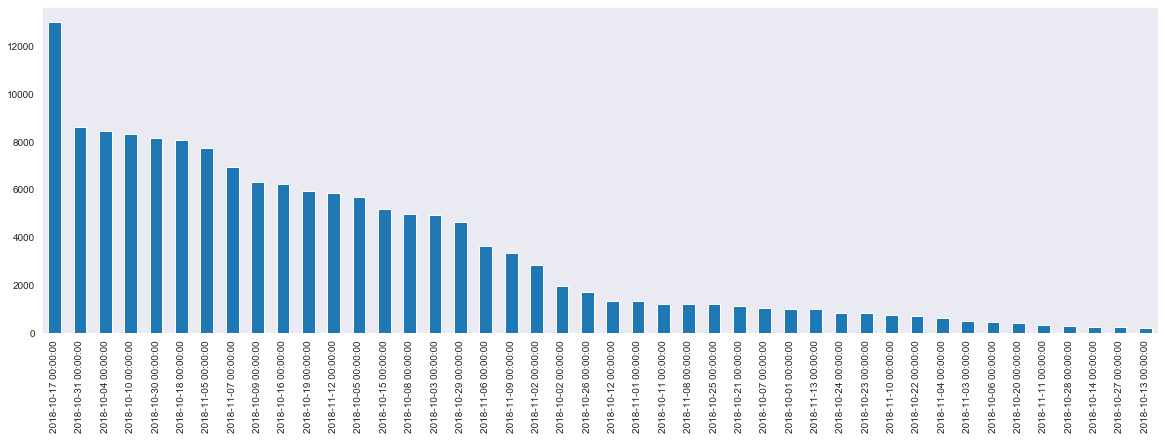

In [30]:
plt.figure(figsize=(20,6))
df['Date'].value_counts()[:44].plot(kind='bar')

Text(0.5, 0, 'Day')

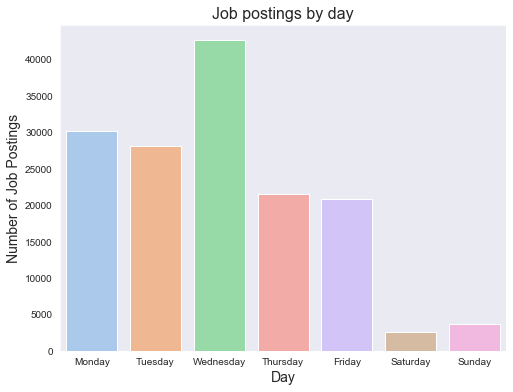

In [31]:
#Visualise the number of job posts by day of week
df_daily_counts = df[df["Date"].isna()==False]
df_daily_counts["Day"] =  [x.strftime("%A") for x in df_daily_counts["Date"]]

df_daily_counts = df_daily_counts.groupby('Day').count()
df_daily_counts['Label'] = df_daily_counts.index
df_daily_counts['Count'] = df_daily_counts["Id"]

plt.figure(figsize=(8,6))
sns.barplot(x="Label", y="Count", data=df_daily_counts, palette='pastel', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.set_style("dark")
plt.title("Job postings by day", fontsize=16)
plt.ylabel('Number of Job Postings',fontsize=14)
plt.xlabel('Day',fontsize=14)

Text(0.5, 0, 'Day of Month')

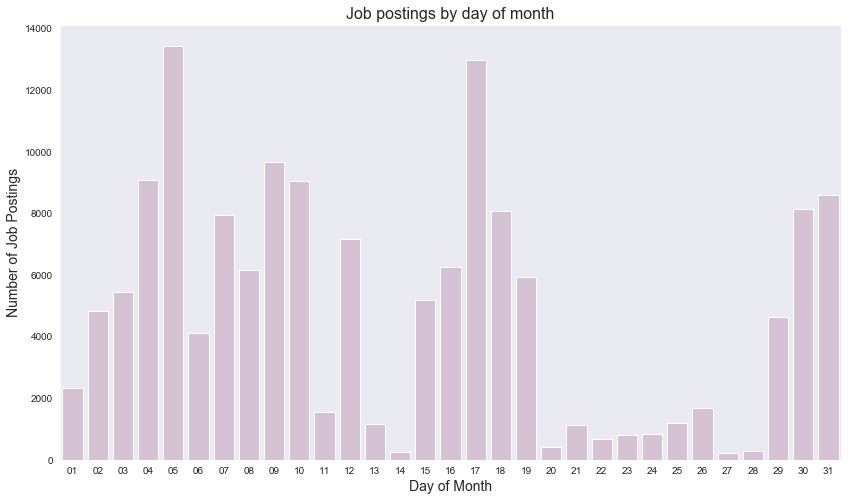

In [32]:
#Visualise the number of job posts by day of the month
df_day_counts = df[df["Date"].isna()==False]
df_day_counts["DayofMonth"] =  [x.strftime("%d") for x in df_day_counts["Date"]]

df_day_counts = df_day_counts.groupby('DayofMonth').count()
df_day_counts['Label'] = df_day_counts.index
df_day_counts['Count'] = df_day_counts["Id"]

plt.figure(figsize=(14,8))
sns.barplot(x="Label", y="Count", data=df_day_counts, color='thistle')
plt.title("Job postings by day of month", fontsize=16)
plt.ylabel('Number of Job Postings',fontsize=14)
plt.xlabel('Day of Month',fontsize=14)

In [33]:
#Visualise trending of the job postings for the big cities. First find top 5 cities:
dfTop5cities = df['Location'].value_counts()[:5]
print (dfTop5cities)

Sydney       46168
Melbourne    35185
Brisbane     16461
Perth         9886
Adelaide      4971
Name: Location, dtype: int64


Text(0.5, 0, 'Date')

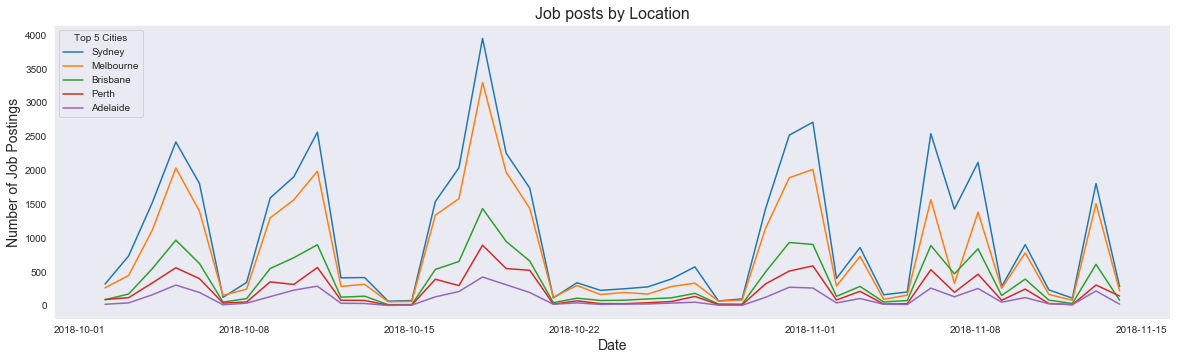

In [34]:
#Visualise trending of the job postings for the big cities. Then plot:
df_Sydney = df[(df["Location"] == "Sydney")]
df_Melbourne = df[(df["Location"] == "Melbourne")]
df_Brisbane = df[(df["Location"] == "Brisbane")]
df_Perth = df[(df["Location"] == "Perth")]
df_Adelaide = df[(df["Location"] == "Adelaide")]

plt.figure(figsize=(20,6))
df_Sydney['Date'].value_counts()[:44].plot(kind='line', label='Sydney')
df_Melbourne['Date'].value_counts()[:44].plot(kind='line', label = 'Melbourne')
df_Brisbane['Date'].value_counts()[:44].plot(kind='line', label = 'Brisbane')
df_Perth['Date'].value_counts()[:44].plot(kind='line', label = 'Perth')
df_Adelaide['Date'].value_counts()[:44].plot(kind='line', label = 'Adelaide')

plt.xticks(rotation=0)
plt.legend(title="Top 5 Cities", loc='upper left')
plt.title("Job posts by Location", fontsize=16)
plt.ylabel('Number of Job Postings',fontsize=14)
plt.xlabel('Date',fontsize=14)

In [35]:
# 2.5 Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.(2 points)
print('This graph represents weekly seasonality time-series. Every week, the peak time of job post is in the middle of the week (Wed - Thur) and the lowest job post is at the begining and the end of each week. ')
print('We can use this data to predict the number of job postings for the next 7 days using moving average method.')

# Parse column Date to type Date
df['Date'] = df["Date"].replace(to_replace=r'T.*',value='',regex=True)
df['Date'] = pd.to_datetime(df['Date'])


This graph represents weekly seasonality time-series. Every week, the peak time of job post is in the middle of the week (Wed - Thur) and the lowest job post is at the begining and the end of each week. 
We can use this data to predict the number of job postings for the next 7 days using moving average method.


There are 44 days in the data set.
We were using the first 30 days to calcualte and forecast for the next 14 days. Then used the 14 actual days to test our prediction.


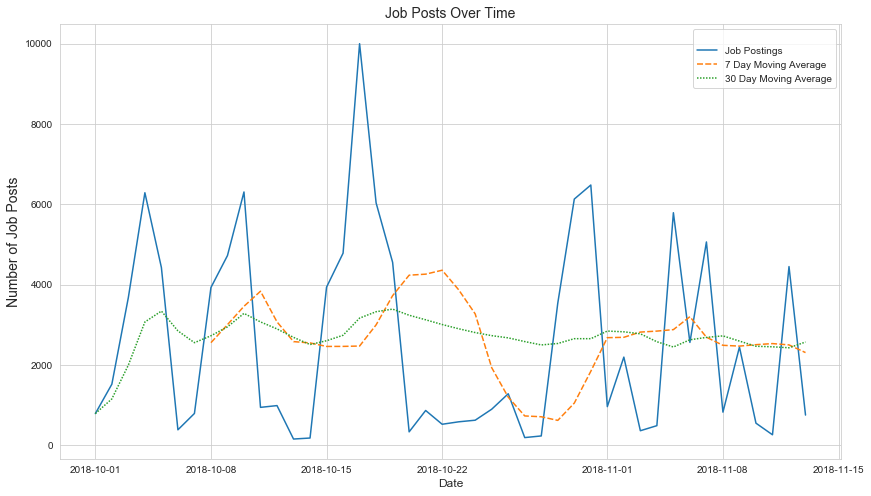

In [36]:
# 3.1 Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.** (3 points)

import matplotlib.dates as mdates
from datetime import date, timedelta
import calendar

# Filter the dataset by top 5 big cities
df_jobpost= df[(df['Location'].isna()==False) & (df['Location'].isin(['Sydney', 'Melbourne', 'Brisbane', 'Perth', 'Adelaide']).astype(int))]

# Group job post by date
df_jobpost = df_jobpost.groupby('Date').agg({'Id': ['count']})
df_jobpost.columns = ['JobPost']
df_jobpost = df_jobpost.reset_index()
df_jobpost = df_jobpost.sort_values(by=["Date"], ascending =True)

# Adding a a type column to store the type of data []"Actual", "4 days moving average","30 days moving average"]
df_jobpost['MA'] = "Job Postings"

# Method to return number of different days between two dates
def diff_date(start, end, dtype):
    x = pd.to_datetime(end) - pd.to_datetime(start)
    return int(x / np.timedelta64(1, dtype))


# Using moving average
def moving_average(df, k, from_date, to_date):
    origindf = df.copy()
    moving_average_df = pd.DataFrame(columns=['Date','JobPost'])
    num_df = len(origindf)
    diffDay = diff_date(from_date, to_date, 'D')
    for m in range(diffDay + 1):
        if m < k:
            # if MA = 30 : Using min periods = 1 to keep the first value, second value as mean of the first two, ect...
            if( k == 30):
                dt_predict = df['JobPost'][0:m+1].mean()    
            else:
                dt_predict = float('nan')
        else:
            history = origindf['JobPost'][m-k:m]
            dt_predict = history.mean()
        moving_average_df.loc[m] = ['{Date.year}-{Date.month}-{Date.day}'.format(Date = from_date + pd.Timedelta(days=m)), dt_predict]
        if m >= num_df:
            origindf.loc[m]= ['{Date.year}-{Date.month}-{Date.day}'.format(Date =  from_date + pd.Timedelta(days=m)), dt_predict]
    return moving_average_df

# Start and end date of graph
sdate = date(2018, 10, 1)  
edate = date(2018, 11, 13) 

# 7 days moving average
ma_df_7Days = moving_average(df_jobpost, 7, sdate, edate)
ma_df_7Days['MA'] = "7 Day Moving Average"

# 30 days moving average 
ma_df_30Days = moving_average(df_jobpost, 30, sdate, edate)
ma_df_30Days['MA'] = "30 Day Moving Average"

# Combine of actual dataset, 7 days dataset, 30 days dataset
eval_df = pd.concat([df_jobpost,ma_df_7Days, ma_df_30Days], ignore_index=True)

# Convert Date to dateime column
eval_df['Date'] = pd.to_datetime(eval_df['Date'])

# Plot the job post for different date and location
sns.set_style("whitegrid")
plt.figure (figsize=(14,8))
ax = sns.lineplot(x="Date", y="JobPost", hue="MA", style="MA", data=eval_df)
ax.legend().texts[0].set_text("")
plt.title('Job Posts Over Time',size=14)
plt.ylabel('Number of Job Posts',fontsize=14)
plt.xlabel('Date',fontsize=12)
print('There are 44 days in the data set.')
print('We were using the first 30 days to calcualte and forecast for the next 14 days. Then used the 14 actual days to test our prediction.')
eval_df.to_csv('D:\DataAnalysis_CyberSecurity\BigData\Assessment\Assessment3\MovingAverage.csv', header=False, index=False)

In [37]:
# Using MSE to measure the average of the squares of the errors. The smaller of the MSE value, the more stable the forecast model. 

sdate = date(2018, 10, 1)  
edate = date(2018, 11, 13) 

# Using 30 first days to calculate and predict 14 days 
fIndex = 30

tIndex = len(ma_df_7Days)

MSE = (df_jobpost['JobPost'][fIndex:tIndex] - moving_average(df_jobpost, 7, sdate, edate)['JobPost'][fIndex:tIndex])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Moving average 7 days", MSE))

MSE = (df_jobpost['JobPost'][fIndex:tIndex] - moving_average(df_jobpost, 30, sdate, edate)['JobPost'][fIndex:tIndex])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Moving average 30 days", MSE))

MSE of Moving average 7 days: 4915927.8250728855
MSE of Moving average 30 days: 4654084.344444444


In [38]:
# 3.2 Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart (hint: you can use the online tool https://wordart.com/create or similar websites)**. (3 points)
import sys

# Cleaning data before text normalization 

# Chose "Information & Communication Technology" sector
df_it = df[(df['Classification'] == "Information & Communication Technology") & (df['SubClassification'] == "Engineering - Software") & (df['Requirement'].notnull())]
df_it.head()

# This method to remove html tags from a strin
def remove_html_tags(text):
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

# Apply remove HTML method to the column FullDescription
df_it['Requirement'] = df_it['Requirement'].replace('nbsp', ' ', regex=True)
df_it['Requirement'] = df_it['Requirement'].apply(remove_html_tags)

#print(df_it )

C:\Users\Ceaira\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Ceaira\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [39]:
# Normalize text by stemming, tokenizing, and removing stopwords. 
from __future__ import print_function, division
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords
import math
from collections import Counter
nltk.download('stopwords')
import pprint 
pp = pprint.PrettyPrinter(indent=4)

def normalize(document):
    # TODO: remove punctuation
    text = "".join([ch for ch in document if ch not in string.punctuation]) #and ch not in string.digits])
    
    # TODO: tokenize text
    tokens = nltk.word_tokenize(text)
    
    # TODO: Stemming
    stemmer = PorterStemmer()
    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    return ret

original_documents = [x.strip() for x in df_it['Requirement']] 
documents = [normalize(d).split() for d in original_documents]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ceaira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ceaira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Implement TF-IDF, including creating the vocabulary, computing term frequency, and normalizing by tf-idf weights

# Flatten all the documents
flat_list = [word for doc in documents for word in doc]

# TODO: remove stop words from the vocabulary
words = [word for word in flat_list if word not in stopwords.words('english')]

# TODO: we take the 500 most common words only
counts = Counter(words)
vocabulary = counts.most_common(500)
print([x for x in vocabulary if x[0] == 'work'])
vocabulary = [x[0] for x in vocabulary]
assert len(vocabulary) == 500

# vocabulary.sort()
vocabulary[:5]
print(vocabulary[:5])

[('work', 266)]
['engin', 'develop', 'work', 'team', 'join']


In [41]:
def tf(vocabulary, documents):
    matrix = [0] * len(documents)
    for i, document in enumerate(documents):
        counts = Counter(document)
        matrix[i] = [0] * len(vocabulary)
        for j, term in enumerate(vocabulary):
            matrix[i][j] = counts[term]
    return matrix

tf = tf(vocabulary, documents)
np.array(vocabulary)[np.where(np.array(tf[1]) > 0)], np.array(tf[1])[np.where(np.array(tf[1]) > 0)]


(array(['engin', 'join', 'softwar', 'opportun', 'senior', 'high', 'growth',
        'start', 'uniqu'], dtype='<U14'),
 array([1, 1, 1, 1, 1, 2, 1, 1, 1]))

In [42]:
def idf(vocabulary, documents):
    """TODO: compute IDF, storing values in a dictionary"""
    idf = {}
    num_documents = len(documents)
   
    for i, term in enumerate(vocabulary):
        idf[term] = math.log(num_documents / sum(term in document for document in documents), 2)
    return idf

idf = idf(vocabulary, documents)
[idf[key] for key in vocabulary[:5]]

[1.5889533609171906,
 1.6335972759720327,
 2.1190241031422747,
 2.412383045832866,
 2.3843686696632695]

In [43]:
def vectorize(document, vocabulary, idf):
    vector = [0]*len(vocabulary)
    counts = Counter(document)
    for i,term in enumerate(vocabulary):
        vector[i] = idf[term] * counts[term]
    return vector

document_vectors = [vectorize(s, vocabulary, idf) for s in documents]
np.array(vocabulary)[np.where(np.array(document_vectors[1]) > 0)], np.array(document_vectors[1])[np.where(np.array(document_vectors[1]) > 0)]


(array(['engin', 'join', 'softwar', 'opportun', 'senior', 'high', 'growth',
        'start', 'uniqu'], dtype='<U14'),
 array([1.58895336, 2.38436867, 2.49235135, 2.75389151, 3.16594515,
        9.12249286, 4.49984589, 5.04041427, 6.62537677]))

In [44]:
# Get the top 50 common words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english', max_features=500)

features = tfidf.fit(original_documents)
corpus_tf_idf = tfidf.transform(original_documents) 

sum_words = corpus_tf_idf.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]

top50_common_words = sorted(words_freq, key = lambda x: x[1], reverse=True)[:100]

# Generate dataframe from list top 50 common words and write to xlsx to visialise in WordArt.
pd.DataFrame(top50_common_words).to_csv('D:\DataAnalysis_CyberSecurity\BigData\Assessment\Assessment3\wordart' + pd.datetime.now().strftime("%d-%b-%Y%H-%M-%S") + '.csv', header=False, index=False)

# Import the csv to Word Art to create the Work Art
print(top50_common_words)
#print('engineer', corpus_tf_idf[1, features.vocabulary_['engineer']])

[('engineer', 47.066567409572805), ('software', 43.081598263462084), ('join', 40.998581315497724), ('developer', 39.619358377290126), ('team', 39.49042681134117), ('work', 39.24776936007338), ('opportunity', 32.07970106841585), ('looking', 31.54581144956173), ('senior', 31.52260469622253), ('contract', 31.10996269301128), ('data', 28.974092943846575), ('sydney', 26.855211031342677), ('development', 26.19981694151182), ('leading', 24.48223389790915), ('role', 23.49221516782403), ('technology', 23.356105735173717), ('company', 22.63406584097638), ('cbd', 22.254196276107972), ('lead', 21.722831835164985), ('experience', 21.315377364090903), ('engineers', 20.99071513646442), ('month', 20.82577763844678), ('exciting', 20.639431938604094), ('based', 20.368326829864277), ('cloud', 19.670403945665146), ('java', 19.53672003487802), ('devops', 19.304811172304184), ('organisation', 19.10172767612753), ('working', 19.01790898399079), ('experienced', 18.486109659651902), ('stack', 18.23764210696261

In [45]:
#Section 2

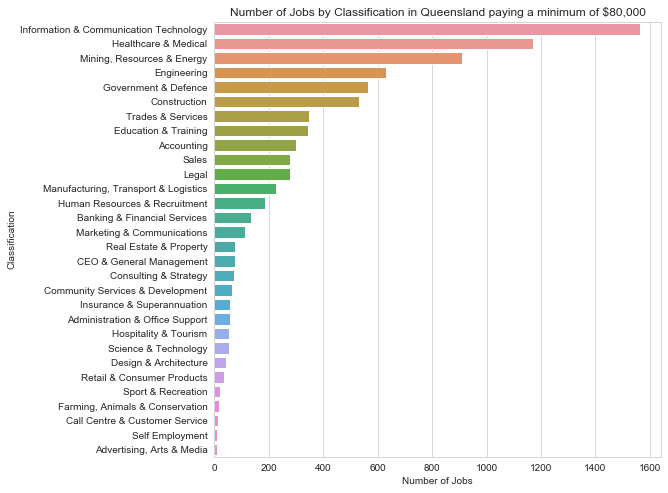

In [46]:
#Section 2, Scenario 1
#Find QLD locations and within QLD locations filter to jobs paying at least $80,000 to find sector Tom should study
df_QLD = df[(df['Location'].isna()==False) & (df['Location'].isin(['Brisbane', 'Mackay & Coalfields', 'Sunshine Coast', 'Gold Coast', 'Hervey Bay & Fraser Coast', 'Toowoomba & Darling Downs', 'Cairns & Far North', 'Northern QLD', 'Rockhampton & Capricorn Coast', 'Gladstone & Central QLD', 'Somerset & Lockyer', 'Western QLD', 'Bundaberg & Wide Bay Burnett']).astype(int))]
df_atleast80kinQLD = df_QLD[(df_QLD['LowestSalary'].fillna("")>= 80.0)]
df_atleast80kinQLD['Classification'].value_counts()

plt.figure(figsize=(8,8))
sns.countplot(y='Classification',data=df_atleast80kinQLD,order=df_atleast80kinQLD.Classification.value_counts().index)
plt.title('Number of Jobs by Classification in Queensland paying a minimum of $80,000')
plt.xlabel('Number of Jobs')
plt.show()

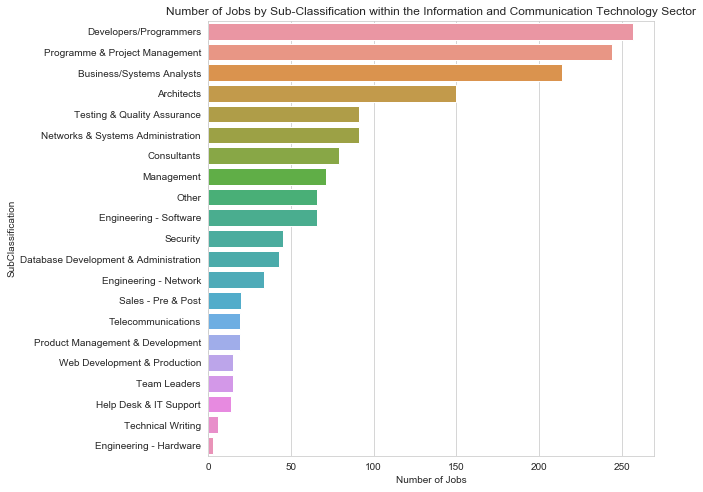

In [47]:
#Section 2, Scenario 1 cont
#Within top sector in QLD paying at least $80,000, i.e. Information and Communication Technology, find top sub-sectors to identify Toms major
df_Tommajor = df_atleast80kinQLD[(df_atleast80kinQLD["Classification"]=="Information & Communication Technology")]
df_Tommajor['SubClassification'].value_counts()

plt.figure(figsize=(8,8))
sns.countplot(y='SubClassification',data=df_Tommajor,order=df_Tommajor.SubClassification.value_counts().index)
plt.title('Number of Jobs by Sub-Classification within the Information and Communication Technology Sector')
plt.xlabel('Number of Jobs')
plt.show()

In [48]:
#Section 2, Scenario 1 cont
#Within top sub-sector in QLD paying at least $80,000, find top keywords used to describe position titles to identify Toms subjects
from __future__ import print_function, division
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords
import math
from collections import Counter
nltk.download('stopwords')
import pprint 
pp = pprint.PrettyPrinter(indent=4)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ceaira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ceaira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
#Section 2, Scenario 1 cont
df_Tomsubjects = df_Tommajor[(df_Tommajor["SubClassification"]=="Developers/Programmers")]

# Normalize text by stemming, tokenizing, and removing stopwords.
def normalize(document):
    #remove punctuation
    text = "".join([ch for ch in document if ch not in string.punctuation])
    
    #tokenize text
    tokens = nltk.word_tokenize(text)
    
    #Stemming
    stemmer = PorterStemmer()
    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    return ret

original_documents = [x.strip() for x in df_Tomsubjects['Title']] 
documents = [normalize(d).split() for d in original_documents]
documents[0]

['front', 'end', 'develop', 'angular']

In [50]:
#Section 2, Scenario 1 cont
# Flatten all the documents
flat_list = [word for doc in documents for word in doc]

#remove stop words from the vocabulary
words = [word for word in flat_list if word not in stopwords.words('english')]

#take the 500 most common words only
counts = Counter(words)
vocabulary = counts.most_common(50)
vocabulary = [x[0] for x in vocabulary]
assert len(vocabulary) == 50

#vocabulary.sort()
vocabulary[:5]

['develop', 'senior', 'net', 'softwar', 'java']

In [51]:
#Section 2, Scenario 1 cont
def tf(vocabulary, documents):
    matrix = [0] * len(documents)
    for i, document in enumerate(documents):
        counts = Counter(document)
        matrix[i] = [0] * len(vocabulary)
        for j, term in enumerate(vocabulary):
            matrix[i][j] = counts[term]
    return matrix

tf = tf(vocabulary, documents)
np.array(vocabulary)[np.where(np.array(tf[1]) > 0)], np.array(tf[1])[np.where(np.array(tf[1]) > 0)]

(array(['develop', 'net', 'sql'], dtype='<U10'), array([1, 1, 1]))

In [52]:
#Section 2, Scenario 1 cont
def idf(vocabulary, documents):
    """compute IDF, storing values in a dictionary"""
    idf = {}
    num_documents = len(documents)
    for i, term in enumerate(vocabulary):
        idf[term] = math.log(num_documents / sum(term in document for document in documents), 2)
    return idf

idf = idf(vocabulary, documents)
[idf[key] for key in vocabulary[:5]]

[0.284525360486693,
 2.0987339535853593,
 2.6133071264151178,
 3.005624549193878,
 3.757697035750293]

In [53]:
#Section 2, Scenario 1 cont
def vectorize(document, vocabulary, idf):
    vector = [0]*len(vocabulary)
    counts = Counter(document)
    for i,term in enumerate(vocabulary):
        vector[i] = idf[term] * counts[term]
    return vector

document_vectors = [vectorize(s, vocabulary, idf) for s in documents]
np.array(vocabulary)[np.where(np.array(document_vectors[1]) > 0)], np.array(document_vectors[1])[np.where(np.array(document_vectors[1]) > 0)]

(array(['develop', 'net', 'sql'], dtype='<U10'),
 array([0.28452536, 2.61330713, 5.68369645]))

In [54]:
#Section 2, Scenario 1 cont
# Get the top 50 common words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english', max_features=500)

features = tfidf.fit(original_documents)
corpus_tf_idf = tfidf.transform(original_documents) 

sum_words = corpus_tf_idf.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:50])

[('developer', 51.808512675825845), ('net', 28.173159880920476), ('senior', 25.977074006821887), ('software', 19.99137693328731), ('java', 14.970615425222414), ('stack', 10.503109517898361), ('sharepoint', 9.91226712834275), ('end', 8.338132835773303), ('integration', 8.32961377399069), ('php', 7.8888889194374165), ('engineer', 6.585221638169753), ('lead', 6.007756267348582), ('bi', 5.989670365944566), ('analyst', 5.496547411605299), ('contract', 5.182305896517814), ('javascript', 4.965916814385713), ('ios', 4.87249578115304), ('mulesoft', 4.753827786652817), ('react', 4.575214424786801), ('specialist', 4.344463392616129), ('consultant', 4.030559155393441), ('application', 3.6793943597206282), ('web', 3.4945068524257112), ('sql', 3.315636287125432), ('brisbane', 3.2877526754968613), ('nodejs', 3.271942743344273), ('angular', 2.9455725758717133), ('business', 2.8836496171446506), ('data', 2.787842252414449), ('lotus', 2.7869511753631726), ('notes', 2.7869511753631726), ('xamarin', 2.646

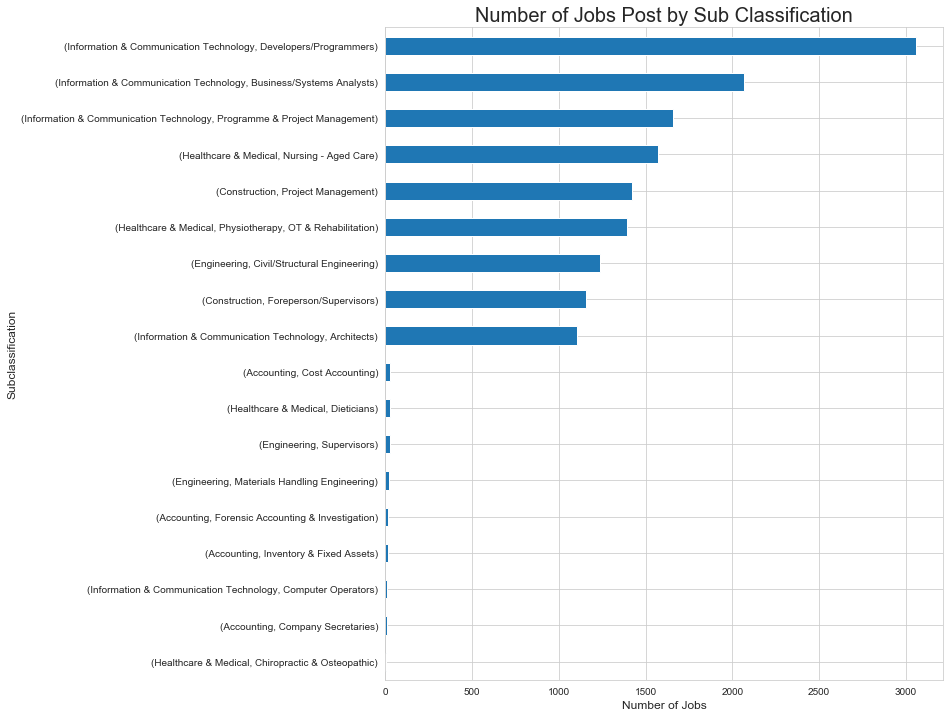

Text(4.050000000000008, 0.5, 'Highest Salary')

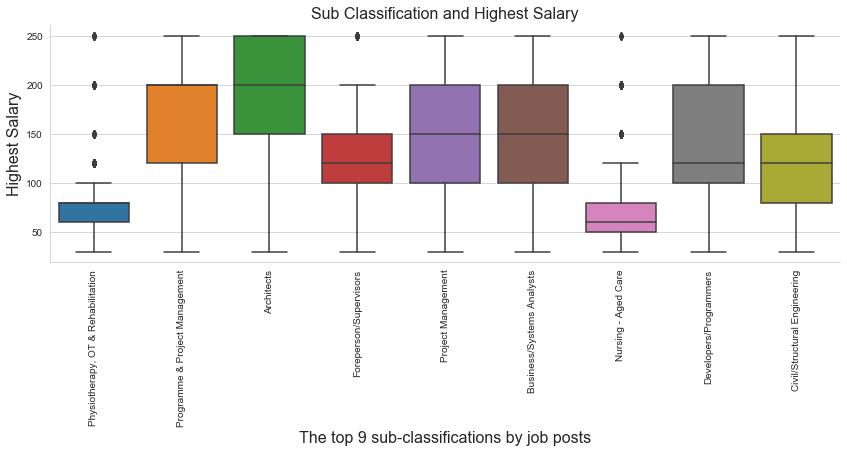

In [55]:
#Section 2, Scenario 2

#Create a list of top classification job types which are currently taught at  Griffith
griffith_courses = ['Information & Communication Technology', 'Healthcare & Medical', 'Engineering', 'Construction', 'Accounting']

df_sub_sectors = df[(df['Classification'].isin(griffith_courses)) & (df['SubClassification'] != "Other")]
df_sub_sectors = df_sub_sectors.groupby(['Classification','SubClassification']).count()
df_sub_sectors['JobPost'] = df_sub_sectors["Id"]
df_sub_sectors['SubClassification2'] = df_sub_sectors.index
df_sub_sectors = df_sub_sectors.reset_index()

top9_sub_sectors = df_sub_sectors.sort_values(by=["JobPost"], ascending =False)
top9_sub_sectors = top9_sub_sectors[:9].copy()

#Re-order the database to show the largest on the top
top9_sub_sectors = top9_sub_sectors.sort_values(by=["JobPost"], ascending =True)

bottom9_sub_sectors = df_sub_sectors.sort_values(by=["JobPost"], ascending =True)
bottom9_sub_sectors = bottom9_sub_sectors[:9].copy()

df_sub_sectors = pd.concat([bottom9_sub_sectors, top9_sub_sectors],sort=False) 

#print(df_sub_sectors)

#Top 10 sub classification which have top job posts
df_sub_sectors=df_sub_sectors[['SubClassification2','SubClassification', 'JobPost']]

df_sub_sectors.plot(x='SubClassification2', y = 'JobPost', kind='barh',legend = False, figsize=(10,12))
plt.title('Number of Jobs Post by Sub Classification', size=20)
plt.xlabel('Number of Jobs', size=12)
plt.ylabel('Subclassification', size=12)
plt.show()

#Salary range in each sub classification in the top 9
#print(top9_sub_sectors)
top9_sub_sectors_string = top9_sub_sectors['SubClassification'].tolist() 

#print(top9_sub_sectors_string)
df_sub_sectors2  = df[(df['SubClassification'].isin(top9_sub_sectors_string)) & (df['Classification'].notnull()) & (df['SubClassification'].notnull()) & (df['SubClassification'] != "Other")]

ax = sns.catplot(x="SubClassification", y="HighestSalary", data = df_sub_sectors2, kind="box", height=4, aspect=3)
ax.set_xticklabels(rotation=90)
plt.title('Sub Classification and Highest Salary',size=16,loc='center')
plt.xlabel('The top 9 sub-classifications by job posts',size=16)
plt.ylabel('Highest Salary',size=16)



There are 44 days in the data set.
Forecasting job posts.


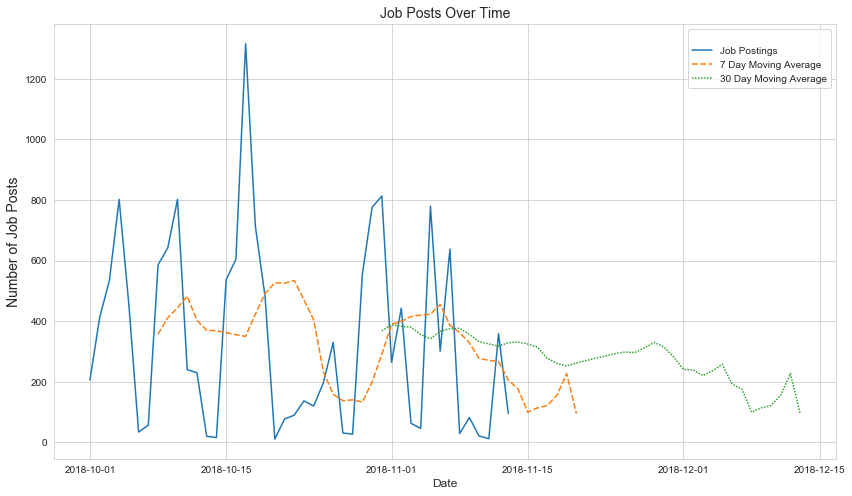

In [56]:
#Section 2, Scenario 2 cont
import matplotlib.dates as mdates
from datetime import date, timedelta
import calendar

#Filter the dataset by top 9 sub sectors within top 5 classifications aligned to Griffith study areas
df_jobpost= df[(df['Classification'].isna()==False) & (df['SubClassification'].isin(top9_sub_sectors_string)) & (df['Classification'].notnull())]

#Group job post by date
df_jobpost = df_jobpost.groupby('Date').agg({'Id': ['count']})
df_jobpost.columns = ['JobPost']
df_jobpost = df_jobpost.reset_index()
df_jobpost = df_jobpost.sort_values(by=["Date"], ascending =True)

#Adding a a type column to store the type of data []"Actual", "7 days moving average","30 days moving average"]
df_jobpost['MA'] = "Job Postings"

#Method to return number of different days between two dates
def diff_date(start, end, dtype):
    x = pd.to_datetime(end) - pd.to_datetime(start)
    return int(x / np.timedelta64(1, dtype))


#Using moving average
def moving_average(df, k, from_date, to_date):
    origindf = df.copy()
    moving_average_df = pd.DataFrame(columns=['Date','JobPost'])
    num_df = len(origindf)
    diffDay = diff_date(from_date, to_date, 'D')
    
    for m in range(diffDay + 1):
        if m < k:
               dt_predict = float('nan')
        else:
            history = origindf['JobPost'][m-k:m]
            dt_predict = history.mean()
        moving_average_df.loc[m] = ['{Date.year}-{Date.month}-{Date.day}'.format(Date = from_date + pd.Timedelta(days=m)), dt_predict]
        if m >= num_df:
            origindf.append(['{Date.year}-{Date.month}-{Date.day}'.format(Date =  from_date + pd.Timedelta(days=m)), dt_predict])
    return moving_average_df

#Start and end date of graph
sdate = date(2018, 10, 1)  
edate = date(2018, 12, 13) 

#7 days moving average
ma_df_7Days = moving_average(df_jobpost, 7, sdate, edate)
ma_df_7Days['MA'] = "7 Day Moving Average"

#30 days moving average 
ma_df_30Days = moving_average(df_jobpost, 30, sdate, edate)
ma_df_30Days['MA'] = "30 Day Moving Average"

#Combine of actual dataset, 7 days dataset, 30 days dataset
eval_df = pd.concat([df_jobpost,ma_df_7Days, ma_df_30Days], ignore_index=True)

#Convert Date to dateime column
eval_df['Date'] = pd.to_datetime(eval_df['Date'])

#Plot the job post for different date and location
sns.set_style("whitegrid")
plt.figure (figsize=(14,8))
ax = sns.lineplot(x="Date", y="JobPost", hue="MA", style="MA", data=eval_df)
ax.legend().texts[0].set_text("")
plt.title('Job Posts Over Time',size=14)
plt.ylabel('Number of Job Posts',fontsize=14)
plt.xlabel('Date',fontsize=12)
print('There are 44 days in the data set.')
print('Forecasting job posts.')
eval_df.to_csv('D:\DataAnalysis_CyberSecurity\BigData\Assessment\Assessment3\MovingAverage.csv', header=False, index=False)